# Chapter: 1

In [5]:
import nltk

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vaibhav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
#dir(nltk)

In [8]:
from nltk.corpus import stopwords

stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [9]:
stopwords.words('english')[0:500:25]

['i', 'herself', 'been', 'with', 'here', 'very', 'doesn', 'won']

## Working on Data

In [10]:
# FIRSW WE ARE OPEINING OUR DATA AND READING IT SO SEE WHAT IT LOOKS LIKE
# WE REALIZE THAT THE VALUES IN A ROW ARE SEPARATED BY 'TAB' SPACE AND 'NEW LINES'

data = open("SMSSpamCollection.tsv").read()

# WE ARE PRINTING THE FIRST 500 TEXT OF OUR DATA

data[0:500]

"ham\tI've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\nham\tNah I don't think he goes to usf, he lives around here though\nham\tEven my brother is not like to speak with me. They treat me like aid"

In [11]:
# IN THE BELOW CODE WE HAVE REPLACE THE 'TAB' SPACE WITH 'NEW LINE' 
# AND THEN WE USE THE SPLIT METHOD TO MAKE TO LIST, WHENEVER IT SEE THE '\n' IT WILL CHOP IT OFF 
# ...and ADD THAT COMPONENT TO THE LIST

parseData = data.replace('\t', '\n').split('\n')

In [12]:
# NOW WE CAN SEE BELOW THAT OUR DATA IS CONVERTED INTO LIST

parseData[0:5]

['ham',
 "I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.",
 'spam',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham']

In [13]:
# NOW WE ARE CREATING THE NEW LIST AND PULLING EVERY SECOND ITEM TO IT
# ....MEANS WE ARE TAKING THE EVEN VALUES THAT ARE 'HAM' AND 'SPAM'

# AND WE HAVE CREATE ANOTHER LIST IN WHICH WE ARE PULLING THE TEXT, WHICH ARE AT THE 'ODD' POSITIONS
labelList = parseData[0::2]
textList = parseData[1::2]

In [14]:
# WE HAVE PRINT THE DATA THAT ARE IN TWO LISTS

print(labelList[0:5],"\n")

print(textList[0:5])

['ham', 'spam', 'ham', 'ham', 'ham'] 

["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.", "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", "Nah I don't think he goes to usf, he lives around here though", 'Even my brother is not like to speak with me. They treat me like aids patent.', 'I HAVE A DATE ON SUNDAY WITH WILL!!']


In [15]:
# THE BELOW CODE GAVE THE ERROR AND THE LENGTH OF BOTH THE LIST WAS NOT SAME

import pandas as pd 

'''df = pd.DataFrame({
    'label': labelList,
    'body_list': textList
})

df.head()'''

"df = pd.DataFrame({\n    'label': labelList,\n    'body_list': textList\n})\n\ndf.head()"

In [16]:
# WE USE THIS CODE TO DETERMING THE LENGTH OF EACH LIST

print(len(labelList))
print(len(textList))

5571
5570


In [17]:
# WE REALIZE THAT IN TEH END OF 'labelList' THERE IS EXTRA FIELD AT THE END

print(labelList[-5:])

['ham', 'ham', 'ham', 'ham', '']


In [18]:
# WE CREATE A NEW DATA FRAME AND PASS BOTH THE LISTS IN IT IN THE FORM OF 'DICTIONARY'

# WE USE THE BELOW CODE TO REMOVE THE LAST ONE LETTER FROM LABEL
# ...WE PRINT ALL THE VALUES EXCEPT THE LAST VALUE

df = pd.DataFrame({
    'label': labelList[:-1],
    'body_list': textList
})

df.head()

,label,body_list
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [19]:
# WE CAN USE THIS CODE TO DO THE SAME WHAT WE DID IN THE ABOVE CODE
# .. WE CAN USE THE 'read_csv' METHOD ADN CAN TELL OUR CODE THAT THE VALUES ARE 'TAB' SEPARATED AND IT WILL PRINT
# ..IN THE SAME WAY AS ABOVE


# WE USE 'header = None'  BECAUSE THE RAW DATASET DOES NOT HAVE COLUMN NAMES, 
# ...SO IT WILL TAKE THE FIRST COLUMN AND ASSUME IT AS A COLUMN NAME

dataset = pd.read_csv("SMSSpamCollection.tsv", sep = '\t', header = None)

dataset.columns = ['Label', 'body_text']

dataset.head()


,Label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


## Explore the Data Set

In [20]:
# KNOW THE SHAPE OF DATA

print(" Input data has {} rows and {} columns". format(len(dataset), len(dataset.columns)))

 Input data has 5568 rows and 2 columns


In [21]:
# KNOW 'SPAM' AND 'HAM'

print("Out of {} rows, {} are Spam and {} are ham".format(len(dataset),
                                    len(dataset[dataset['Label'] == 'spam']),
                                    len(dataset[dataset['Label'] == 'ham'])))

Out of 5568 rows, 746 are Spam and 4822 are ham


In [22]:
# KNOW THE MISSING DATA

print("Number of null in label: {}". format(dataset['Label'].isnull().sum()))

print("Number of null in label: {}". format(dataset['body_text'].isnull().sum()))

Number of null in label: 0
Number of null in label: 0


## Regular Expressions(RegEx)

In [23]:
# [0-9]+ THE '+' SIGN WILL HELP US TO RETURN THE NUMBER IN COMBINATION
# [L-P] THIS WILL RETURN ONLY ONE LETTER
# [L-P0-9]+   THIS WILL RETURN THE COMBINATION OF NUMBERS AND LETTERS

In [24]:
import re  # This package allows us to use functions that we can use with RegEx

test1 = 'This the not the messy sentence'
test2 = ' This a messy    sentence    with lots of   spacs in it'
test3 = ' This is a --- messy / sentence with-several. random charecters--- in it.'



### Splittign the above sentences in the list of words. It is also called 'Tokenization'

#### 'split' method looks for the spaces and 'findall' method looks for words.
#### where  \w  is based on words and  \s  is beased on white spaces.

In [25]:
re.split('\s', test1)


['This', 'the', 'not', 'the', 'messy', 'sentence']

In [26]:
re.split('\s', test2)

['',
 'This',
 'a',
 'messy',
 '',
 '',
 '',
 'sentence',
 '',
 '',
 '',
 'with',
 'lots',
 'of',
 '',
 '',
 'spacs',
 'in',
 'it']

In [27]:
# The '+' sign will tell Python to loook for one or more white spaces.

re.split('\s+', test2)

['',
 'This',
 'a',
 'messy',
 'sentence',
 'with',
 'lots',
 'of',
 'spacs',
 'in',
 'it']

In [28]:

re.split('\s+', test3)

['',
 'This',
 'is',
 'a',
 '---',
 'messy',
 '/',
 'sentence',
 'with-several.',
 'random',
 'charecters---',
 'in',
 'it.']

In [29]:
# The '+' did not able to hande the special characters in the above statement
# So we are using the different method '\W+' this will search for non-word character


re.split('\W+', test3)

['',
 'This',
 'is',
 'a',
 'messy',
 'sentence',
 'with',
 'several',
 'random',
 'charecters',
 'in',
 'it',
 '']

In [30]:
''' Now we are reversing the above procedure - Instead of finding the
spaces we are now trying to find the words.
To do this we are using the 'findall' method.
We have shange the small 's' to capital 'S' which will find the word instead
of spaces between the words'''

re.findall('\S+', test3)

['This',
 'is',
 'a',
 '---',
 'messy',
 '/',
 'sentence',
 'with-several.',
 'random',
 'charecters---',
 'in',
 'it.']

In [31]:
# Now we are replacing he capital 'W' with small 'w'

re.findall('\w+', test3)

['This',
 'is',
 'a',
 'messy',
 'sentence',
 'with',
 'several',
 'random',
 'charecters',
 'in',
 'it']

### REPLACING THE SPECIFIC STRING

In [32]:
sample1 = 'I try to follow PEP9 guidelines'
sample2 = 'I try to follow PEP2 guidelines'
sample3 = 'I try to follow PEP8 guidelines'

In [33]:
# WHAT WE LEARN FROM THE BELOW CODE IS REGEX IS CASE SENSITIVE, IT IS LOOKING FOR VALUES ONLY WITH SMALL LETTERS
# IF WE DEFINE THE VALUES IN SMALL LETTERS THEN IT WILL FIND ONLY SMALL LETTERS

re.findall('[a-z]+', sample1)

['try', 'to', 'follow', 'guidelines']

In [34]:
# THE BELOW RegEx PRINT THE ONLY CAPTIAL VALUES, BUT DIDN'T INCLUDE 8

re.findall('[A-Z]+', sample1)

['I', 'PEP']

In [35]:
# THE BELOW CODE IS CAPTURING THE NUMBER AS WELL IN PEP

re.findall('[A-Z]+[0-9]', sample1)

['PEP9']

In [36]:
# THE BELOW CODE WILL FIND THE 'PEP8' AND REPLACE IT WITH 'PEP8 Python Styleguide'

re.sub('[A-Z]+[0-9]+', 'PEP8 Python Styleguide', sample1)

'I try to follow PEP8 Python Styleguide guidelines'

`There are many other RegEx methods, Like 

- re.search()
- re.match()
- re.fullmatch()
- re.finditer()
- re.escape()

'The best way to learn RegEx is to open cheatsheet and to practice various RegEx`

### -------------------------------------------------------------------------------------

'The main steps involves in working on NLP are:

'1. We have a Raw text which in completely unstructured, which we have to convert into the structured text.

'2. Then we have to Tokenize the sentence, Tokexizing is the process of splitting the sentence into words. It makes easy for python, where to look  at.

'3. Then we have to remove the Stop Words like I, an, the, and, of etc doesnt contribute much to the sentehce, so its better of we remove them. Removing these words helps python to concentrate on more important words and also reduces the data size.

'4. Next step is called Vectorizing, it is the process in which we convert our text into Matrix on numbers, so that we can apply Machine Learnng algorithms to it, as machine learning models are good when it comes to work on numbers. In which Rows are the Messages and Columns are the Words.

'5.Now that we have the Numeric Matrix, we can now apply machine learning algorithms to it, to  create a model.

---------------------------------------------------------

1. Raw Text

2. Tokenize

3. Cleaning the Text

4. Vectorize

5. Apply Machine Learning Algorithms

6. Spam Filter
 


### Pre-precessing the text data
`The first 3 steps are used in every pipeline, the 4th one is bit advanced and is not used in every project:

`1. First we have to Remove Punctuations

`2. Tokenize the words

`3. Remove Stopwords

`4. Lemmatize and Stem

In [37]:

# WE WANT TO SEE 100 CHARACTERS IN OUR PANDAS DATAFRAME

pd.set_option('display.max_colwidth', 100)

df = pd.read_csv('SMSSpamCollection.tsv', sep = '\t', header = None)

df.columns = ['label', 'body_text']

df.head()

,label,body_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [38]:
# CLEANING THE DATA AND PUTTING THE TOKENIZED VALUES IN ANOTHER COLUMN

data_cleaned = pd.read_csv('SMSSpamCollection.tsv', sep = '\t')

data_cleaned.head()

,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
1,ham,"Nah I don't think he goes to usf, he lives around here though"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...


#### Remove Punctuation

In [39]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [40]:
# The python consider the below strings different

"I like NLP." == "I like NLP"

False

In [41]:
# So if we see anything like above, we want to remove it.
'''So to clean this up, we will take the list of punctuations. And set a 
Loop on it. So whenever the python see the punctuations like this, it will 
remove it. We are using "List Comprihension to do this". The List Comprihension
makes it easy to cycle through elements, check it if they meet some condition
and return the output '''

def remove_punct(text):
    text_nopunctuation = [char for char in text if char not in string.punctuation]
    
    return text_nopunctuation
    
df['body_text_clean'] = df['body_text'].apply(lambda x: remove_punct(x))

df.head()
    


,label,body_text,body_text_clean
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,"[I, v, e, , b, e, e, n, , s, e, a, r, c, h, i, n, g, , f, o, r, , t, h, e, , r, i, g, h, t,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[F, r, e, e, , e, n, t, r, y, , i, n, , 2, , a, , w, k, l, y, , c, o, m, p, , t, o, , w,..."
2,ham,"Nah I don't think he goes to usf, he lives around here though","[N, a, h, , I, , d, o, n, t, , t, h, i, n, k, , h, e, , g, o, e, s, , t, o, , u, s, f, ,..."
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[E, v, e, n, , m, y, , b, r, o, t, h, e, r, , i, s, , n, o, t, , l, i, k, e, , t, o, , s,..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[I, , H, A, V, E, , A, , D, A, T, E, , O, N, , S, U, N, D, A, Y, , W, I, T, H, , W, I, L, L]"


In [42]:
# WE CAN JOIN THE SENTENCES BY USING THE JOIN FUNCTION BELOW

def remove_punct(text):
    text_nopunctuation = "".join([char for char in text if char not in string.punctuation])
    
    return text_nopunctuation
    
df['body_text_clean'] = df['body_text'].apply(lambda x: remove_punct(x))

df.head()
    

,label,body_text,body_text_clean
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL


### Tekenization

In [43]:

import re

def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens
             
df['body_text_tokenized'] = df['body_text_clean'].apply(lambda x: tokenize(x.lower()))
             
df.head()


,label,body_text,body_text_clean,body_text_tokenized
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]"


### Removing Stopwords

In [44]:
import nltk

stopword = nltk.corpus.stopwords.words('english')

In [45]:
def remove_stopwords(tokenized_list):
    text = (word for word in tokenized_list if word not in stopword)
    
df['body_text_nostop'] = df['body_text_tokenized'].apply(lambda x: remove_stopwords(x))

df.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...",None
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...",None
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]",None
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]",None
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]",None


# Chapter: 2 - Supplemental Data Cleaning

In this chapter we will study about the Stemming and Lemmatizing

Stemming: It is the process of reducing inflected(or something derived) words to their word stem or root. Or in othr words it is th process of chopping off the end of the word and leave only the base. 

It helps in reducing the words that python has to look at or consider.

For eg: 

Stemming/ Stemmed would be changed to Stem

Electricity/ Electrical ----> Electr

Earries/ Berry ----> Berri

Connection/Connected/Connective ----> Connect


Lemmatizing: It is the process of grouping together the inflected forms of a word so they can be analyzed as a single term, identified by the word's lemma. The 'lemma' is a canonical from of set of words.

How is Lemmatizing and Stemming are differnet:

- The goal of both is to condense derived words into their base forms.

- stemming is fast as it simply chops off the end of a word using heuristics, without any understanding of the context in which a word is used. Becuase of this the stemming may or may not return the actual word in the dictionary. It is usually less accurate, but it is faster.

- Lemmatizing is more accurate as it uses more informed analysis to create groups of words with similar meaning based on the context around the word. It always returns the dictionary words, so it is more accurate, but its more computationally extensive.




In [46]:
import nltk

ps = nltk.PorterStemmer()

In [ ]:
#dir(ps)

In [ ]:
# USING THE STEM FUNCTION

print(ps.stem('grows'))
print(ps.stem('growing'))
print(ps.stem('grow'))

grow
grow
grow


In [ ]:
print(ps.stem('run'))
print(ps.stem('running'))
print(ps.stem('runner'))

run
run
runner


In [ ]:
import pandas as pd
import re
import string

pd.set_option('display.max_colwidth', 100)


stopwords = nltk.corpus.stopwords.words('english')

dt = pd.read_csv("SMSSpamCollection.tsv", sep = '\t')
dt.columns = ['lable', 'body_text']

dt.head()

,lable,body_text
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
1,ham,"Nah I don't think he goes to usf, he lives around here though"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...


### Clean up the Text

In [ ]:
def clean_text(text):
    text = "".join([word for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    return text

dt['body_text_nonstop'] = dt['body_text'].apply(lambda x: clean_text(x.lower()))

dt.head()

,lable,body_text,body_text_nonstop
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
1,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aids, patent]"
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]"
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, callers, pr..."


### Stemming Text

In [ ]:
def stemming(tokexized_text):
    text = [ps.stem(word) for word in tokexized_text]
    return text

dt['body_text_stemmed'] = dt['body_text_nonstop'].apply(lambda x:stemming(x))

dt.head()
    

,lable,body_text,body_text_nonstop,body_text_stemmed
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,..."
1,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]"
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]","[date, sunday]"
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, callers, pr...","[per, request, mell, mell, oru, minnaminungint, nurungu, vettam, set, callertun, caller, press, ..."


### Lemmatizing Text

We gonna do it in 2 steps:

First we gonna use Lemmatizer on specific words to understand how it works

Second, we gonna apply it on SMS Spam data set to clean it up further.

There are many Lemmatizer, but we gonna use 'WordNet' Lemmatizer. It is the collection of nouns, verbs, adjectives and adverbs, that are grouped together in the set of synonyms and each expressing destince concept.

It runs on the corpus of synonyms. So if we give it a word, it will track it with its synonyms and will represent the distince concept of those group of words.

In [ ]:
import nltk
from nltk import wordnet

#Using WordNet Lemmatizer and PorterStemmer

wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()


In [ ]:
#nltk.download('wordnet')

In [ ]:
#dir(wn)

In [ ]:
print(ps.stem('meanness'))
print(ps.stem('meaning'))

mean
mean


In [ ]:
# THE LEMMATIZER SERCHES THE WHOLE DICTIONARY TO FIND THE RELATED WORDS AND THEN GIVES US AN ACTUAL WORD
# AND IF TH WORD IS NOT IN THE DICTIONARY, THEN IT WILL JUST RETURN THE ORIGINAL WORD.

print(wn.lemmatize('meanness'))
print(wn.lemmatize('meaning'))

meanness
meaning


In [ ]:
# APPLYING STEMMING ON ANOTHER EXAMPLE

print(ps.stem('goose'))
print(ps.stem('geese'))

goos
gees


In [ ]:
print(wn.lemmatize('goose'))
print(wn.lemmatize('geese'))

goose
goose


### Reading the Raw Text

In [ ]:
import pandas as pd
import re
import string

pd.set_option('display.max_colwidth', 100)


stopwords = nltk.corpus.stopwords.words('english')

dt = pd.read_csv("SMSSpamCollection.tsv", sep = '\t')
dt.columns = ['lable', 'body_text']

dt.head()

,lable,body_text
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
1,ham,"Nah I don't think he goes to usf, he lives around here though"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...


### Cleaning up the Text

In [ ]:
def clean_text(text):
    text = "".join([word for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    return text

str="I love Natural Language.Proccessing"
clean_text(str)

['I', 'love', 'Natural', 'LanguageProccessing']

In [ ]:
def clean_text(text):
    text = "".join([word for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    return text

dt['body_text_nonstop'] = dt['body_text'].apply(lambda x: clean_text(x.lower()))

dt.head()

,lable,body_text,body_text_nonstop
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
1,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aids, patent]"
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]"
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, callers, pr..."


### Lemmatizing Text

In [ ]:
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

dt['lemmatized_body_text'] = dt['body_text_nonstop'].apply(lambda x: lemmatizing(x))

dt.head(10)

,lable,body_text,body_text_nonstop,lemmatized_body_text
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
1,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, go, usf, life, around, though]"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]"
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]","[date, sunday]"
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, callers, pr...","[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, caller, pre..."
5,spam,WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To c...,"[winner, valued, network, customer, selected, receivea, 900, prize, reward, claim, call, 0906170...","[winner, valued, network, customer, selected, receivea, 900, prize, reward, claim, call, 0906170..."
6,spam,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with came...,"[mobile, 11, months, u, r, entitled, update, latest, colour, mobiles, camera, free, call, mobile...","[mobile, 11, month, u, r, entitled, update, latest, colour, mobile, camera, free, call, mobile, ..."
7,ham,"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried ...","[im, gonna, home, soon, dont, want, talk, stuff, anymore, tonight, k, ive, cried, enough, today]","[im, gonna, home, soon, dont, want, talk, stuff, anymore, tonight, k, ive, cried, enough, today]"
8,spam,"SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, ...","[six, chances, win, cash, 100, 20000, pounds, txt, csh11, send, 87575, cost, 150pday, 6days, 16,...","[six, chance, win, cash, 100, 20000, pound, txt, csh11, send, 87575, cost, 150pday, 6days, 16, t..."
9,spam,"URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM...","[urgent, 1, week, free, membership, 100000, prize, jackpot, txt, word, claim, 81010, tc, wwwdbuk...","[urgent, 1, week, free, membership, 100000, prize, jackpot, txt, word, claim, 81010, tc, wwwdbuk..."


# Chapter 3: Vectorizing Raw Data

Vectorizing is the process of converting the text into numeric form, so that it can we easily understood by our machine learning model. In other words, it is the process of encoding text as integers to create feature vectors.

Feature Vector: It is an n-dimensional vector of numerical features that represent some object. In our case we would be taking a text message and converting it into numeric vector, that represents that text message.

Document Term Matrix:

In spam detection, our model actually counts the occurance of certin word and determines whether the message is spam or ham. 

#### The Vectorization has mainly 3 types:

1. Count Vectorization: In which we count the occurance of certain word.

2. N-grams: 

3. Term Frequency - Inverse Document Frequency(TF_IDF)

### 1. Count Vectorization implementation

#### Reading the Text

In [ ]:
import pandas as pd
import re
import string
import nltk

pd.set_option('display.max_colwidth', 100)


stopwords = nltk.corpus.stopwords.words('english')

ps = nltk.PorterStemmer()

dt = pd.read_csv("SMSSpamCollection.tsv", sep = '\t')
dt.columns = ['lable', 'body_text']

dt.head()

,lable,body_text
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
1,ham,"Nah I don't think he goes to usf, he lives around here though"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...


#### Create function to remove punctuation, tokenize, remove stowords and stem

In [ ]:
# IN THE BELOW CODE WE ARE USING THE STEMMER TO STEM THE WORDS AND WE ARE NOT USING 'LAMBDA' FUNCTION HERE

def clean_text(text):
    text = "".join([word for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text) 
    
# USING THE STEMMBR IN THE BELOW LINE  

    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

#dt['body_text_nonstop'] = dt['body_text'].apply(lambda x: clean_text(x.lower()))

#dt.head()

#### Applying CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer = clean_text)

# WE ARE USING FIT_TRANSFORM METHOD TO FIT OUR MODEL AND TRANSFORM IT, 
# IF WE USE ONLY 'FIT' THEN IT WILL NOT TRANSFORM THE DATA

X_counts = count_vect.fit_transform(dt['body_text'])

print(" There are total 5567 text messages and 8334 unique words in those text messages \n Which means our document term matrix has 5567 rows and 8334 columns", '\n')

print(X_counts.shape, '\n')

#print(count_vect.get_feature_names())



 There are total 5567 text messages and 8334 unique words in those text messages 
 Which means our document term matrix has 5567 rows and 8334 columns 

(5567, 8334) 



#### Applying CountVectorizer on small sample of data

In [ ]:

data_sample = dt[0:20]

count_vect_sample = CountVectorizer(analyzer = clean_text)

# WE ARE USING FIT_TRANSFORM METHOD TO FIT OUR MODEL AND TRANSFORM IT, 
# IF WE USE ONLY 'FIT' THEN IT WILL NOT TRANSFORM THE DATA

X_counts_sample = count_vect_sample.fit_transform(data_sample['body_text'])


print("There are total 20 rows and 212 columns: ", X_counts_sample.shape, '\n')

print(count_vect_sample.get_feature_names())

There are total 20 rows and 212 columns:  (20, 212) 

['08002986030', '08452810075over18', '09061701461', '1', '100', '100000', '11', '12', '150pday', '16', '2', '20000', '2005', '21st', '3', '4', '4403ldnw1a7rw18', '4txtú120', '6day', '81010', '87077', '87121', '87575', '9', '900', 'A', 'As', 'Co', 'Eh', 'FA', 'HL', 'He', 'I', 'Im', 'Is', 'No', 'ON', 'Oh', 'R', 'So', 'TC', 'To', 'U', 'aft', 'aid', 'alreadi', 'alright', 'anymor', 'appli', 'ard', 'around', 'b', 'brother', 'call', 'caller', 'callertun', 'camera', 'cash', 'chanc', 'claim', 'click', 'code', 'colour', 'comin', 'comp', 'copi', 'cost', 'credit', 'cri', 'csh11', 'cup', 'custom', 'da', 'date', 'dont', 'eg', 'england', 'enough', 'entitl', 'entri', 'even', 'feel', 'ffffffffff', 'final', 'fine', 'finish', 'first', 'free', 'friend', 'from', 'go', 'goalsteam', 'goe', 'gonna', 'gota', 'ha', 'had', 'have', 'home', 'hour', 'httpwap', 'info', 'ive', 'jackpot', 'joke', 'k', 'kim', 'kl341', 'lar', 'latest', 'lccltd', 'like', 'link', 'live

#### The data output what we can see above from the CountVectorizer is called Sparse Matrices

In [ ]:
X_counts_sample

<20x212 sparse matrix of type '<class 'numpy.int64'>'
	with 242 stored elements in Compressed Sparse Row format>

In [ ]:
# TO PRINT OUT THE MATRIX, WE HAVE TO EXPAND THIS SPARSE MATRIX TO A COLLECTION
# ...OF ARRAY AND THEN CREATE A DATAFROM FROM THEM.

x_counts_df = pd.DataFrame(X_counts_sample.toarray())

print("There are total 20 rows and 212 columns in our Document Term Matrix: ", X_counts_sample.shape, '\n')

x_counts_df

There are total 20 rows and 212 columns in our Document Term Matrix:  (20, 212) 



,0,1,2,3,4,5,6,7,8,9,...,202,203,204,205,206,207,208,209,210,211
0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0


#### Now we want to see what word in each column actually represents

In [ ]:
x_counts_df.columns = count_vect_sample.get_feature_names()

x_counts_df

,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150pday,16,...,winner,with,wkli,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,you,ü
0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0


### 2. N-Grams implementation

The N-Grams process createa a Document-term matrix where counts still occupy the cell but instead of the columns representing single teerms, they represent all combinations of adjacent words of length 'n' in your text.

Tha N-Grams are in the form of Bi-Grams, Tri-Grams, Four-Grams upto N-Grams.

For Eg, "I like NLP" in Bi-Gram would be "I like", "like NLP"


"NLP is an interesting topic"

| n | Name      | Tokens                                                         |
|---|-----------|----------------------------------------------------------------|
| 2 | bigram    | ["nlp is", "is an", "an interesting", "interesting topic"]      |
| 3 | trigram   | ["nlp is an", "is an interesting", "an interesting topic"] |
| 4 | four-gram | ["nlp is an interesting", "is an interesting topic"]    |

#### Reading the Data

In [ ]:
import pandas as pd
import re
import string
import nltk

pd.set_option('display.max_colwidth', 100)


stopwords = nltk.corpus.stopwords.words('english')

ps = nltk.PorterStemmer()

dt = pd.read_csv("SMSSpamCollection.tsv", sep = '\t')
dt.columns = ['lable', 'body_text']


#### Create function to remove punctuation, tokenize, remove stowords and stem

In [ ]:

def clean_text(text):
    text = "".join([word for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    
# USING THE STEMMBR IN THE BELOW LINE   
    
    text = " ".join([ps.stem(word) for word in tokens if word not in stopwords])
    return text

dt['cleaned_text'] = dt['body_text'].apply(lambda x: clean_text(x))

dt.head()

,lable,body_text,cleaned_text
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,free entri 2 wkli comp win FA cup final tkt 21st may 2005 text FA 87121 receiv entri questionstd...
1,ham,"Nah I don't think he goes to usf, he lives around here though",nah I dont think goe usf live around though
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even brother like speak they treat like aid patent
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I have A date ON sunday with will
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,As per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi fri...


#### Applying CountVectorizer with N-Grams

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# IN THE BELOW CODE WE CAN CHANGE TO RANGE OF NGRAM TO (1,3), (2,3), (1,2) ETC. TO MAKE IT TRI-GRAM, FOUR-GRAM ETC

ngram_vect = CountVectorizer(ngram_range= (2,2))

x_counts = ngram_vect.fit_transform(dt['cleaned_text'])

print(x_counts.shape, '\n')

#print(ngram_vect.get_feature_names())


(5567, 34114) 



#### Applying CountVectorizer with N-Grams to a smaller sample

In [ ]:
data_sample = dt[0:20]

# IN THE BELOW CODE WE CAN CHANGE TO RANGE OF NGRAM TO (1,3), (2,3), (1,2) ETC. TO MAKE IT TRI-GRAM, FOUR-GRAM ETC

ngram_vect_sample = CountVectorizer(ngram_range= (2,2))

x_counts_sample = ngram_vect_sample.fit_transform(data_sample['cleaned_text'])

print(x_counts_sample.shape, '\n')

print(ngram_vect_sample.get_feature_names())

(20, 217) 

['09061701461 claim', '100 20000', '100000 prize', '11 month', '12 hour', '150pday 6day', '16 tsandc', '20000 pound', '2005 text', '21st may', '4txtú120 poboxox36504w45wq', '6day 16', '81010 tc', '87077 eg', '87077 trywal', '87121 receiv', '87575 cost', '900 prize', 'aft finish', 'aid patent', 'alright way', 'anymor tonight', 'appli 08452810075over18', 'appli repli', 'ard smth', 'around though', 'as per', 'as valu', 'brother like', 'call 09061701461', 'call the', 'caller press', 'callertun caller', 'camera free', 'cash from', 'chanc win', 'claim call', 'claim code', 'claim no', 'click httpwap', 'click wap', 'co free', 'code kl341', 'colour mobil', 'comp win', 'copi friend', 'cost 150pday', 'credit click', 'cri enough', 'csh11 send', 'cup final', 'custom select', 'da stock', 'date on', 'dont miss', 'dont think', 'dont want', 'eg england', 'eh rememb', 'england 87077', 'england macedonia', 'enough today', 'entitl updat', 'entri questionstd', 'entri wkli', 'even brother', 'fa 

#### Vectorizing output Sparse Matrix

Sparse Matrix: A matrix in which most entries are 0. In the interest of efficient storage, a sparse matrix will be stored by only storing the locations of the non-sero elements.

In [ ]:
'''# TO PRINT OUT THE MATRIX, WE HAVE TO EXPAND THIS SPARSE MATRIX TO A COLLECTION
# ...OF ARRAY AND THEN CREATE A DATAFROM FROM THEM.

x_counts_df = pd.DataFrame(X_counts_sample.toarray())

x_counts_df.columns = ngram_vect_sample.get_feature_names()

x_counts_df

# len(x_counts_df, x_counts_df.columns)'''

'# TO PRINT OUT THE MATRIX, WE HAVE TO EXPAND THIS SPARSE MATRIX TO A COLLECTION\n# ...OF ARRAY AND THEN CREATE A DATAFROM FROM THEM.\n\nx_counts_df = pd.DataFrame(X_counts_sample.toarray())\n\nx_counts_df.columns = ngram_vect_sample.get_feature_names()\n\nx_counts_df\n\n# len(x_counts_df, x_counts_df.columns)'

### TF-IDF (Term Frequency- Inverse Document Frequency)

TF-IDF creates a Document Term Matrix, when there is one row per text message and the colums represents teh single unique terms. But instead of cells representing the count, the cells represents the weightings, that is meant to identify how important is the word to an individual text message.

It is expressed by the formuls:

Wi,f = TF(i,j) x log(N/df(i))

where,

TF(i,j) = Number of times 'i' occure in message 'j' divided by total number of words in 'j'


df(I) = Number of documents containing i( This part measures how frequently word occurs across all other text messages)

N = total number of documents

Eg: " I like NLP"   and if we are looking at NLP, then 1/3

#### Reading the data

In [ ]:
import pandas as pd
import re
import string
import nltk

pd.set_option('display.max_colwidth', 100)


stopwords = nltk.corpus.stopwords.words('english')

ps = nltk.PorterStemmer()

dt = pd.read_csv("SMSSpamCollection.tsv", sep = '\t')
dt.columns = ['lable', 'body_text']


#### Create function to remove punctuation, tokenize, remove stowords and stem

In [ ]:
def clean_text(text):
    text = "".join([word for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    
# USING THE STEMMBR IN THE BELOW LINE   
    
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

#dt['cleaned_text'] = dt['body_text'].apply(lambda x: clean_text(x))

#dt.head()

#### Applying TfidfVactorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer = clean_text)
x_tfidf = tfidf_vect.fit_transform(df['body_text'])

print(x_tfidf.shape)

#print(tfidf_vect.get_feature_names())

(5568, 8337)


#### Applying TfidfVectorizer on small sample for better understanding

In [ ]:
data_sample = dt[0:20]

tfidf_vect_sample = TfidfVectorizer(analyzer = clean_text)
x_tfidf_sample = tfidf_vect_sample.fit_transform(data_sample['body_text'])

print(x_tfidf_sample.shape)
print(tfidf_vect_sample.get_feature_names())

(20, 212)
['08002986030', '08452810075over18', '09061701461', '1', '100', '100000', '11', '12', '150pday', '16', '2', '20000', '2005', '21st', '3', '4', '4403ldnw1a7rw18', '4txtú120', '6day', '81010', '87077', '87121', '87575', '9', '900', 'A', 'As', 'Co', 'Eh', 'FA', 'HL', 'He', 'I', 'Im', 'Is', 'No', 'ON', 'Oh', 'R', 'So', 'TC', 'To', 'U', 'aft', 'aid', 'alreadi', 'alright', 'anymor', 'appli', 'ard', 'around', 'b', 'brother', 'call', 'caller', 'callertun', 'camera', 'cash', 'chanc', 'claim', 'click', 'code', 'colour', 'comin', 'comp', 'copi', 'cost', 'credit', 'cri', 'csh11', 'cup', 'custom', 'da', 'date', 'dont', 'eg', 'england', 'enough', 'entitl', 'entri', 'even', 'feel', 'ffffffffff', 'final', 'fine', 'finish', 'first', 'free', 'friend', 'from', 'go', 'goalsteam', 'goe', 'gonna', 'gota', 'ha', 'had', 'have', 'home', 'hour', 'httpwap', 'info', 'ive', 'jackpot', 'joke', 'k', 'kim', 'kl341', 'lar', 'latest', 'lccltd', 'like', 'link', 'live', 'lor', 'lunch', 'macedonia', 'make', 'may

#### Vectorized output sparse matrices

On running the code we will see the various numbers, which shows the frequence of occurance of various words.

If we see the number '12' then the number 0.2226 tell us that the 12 is occuring more in 5th text message and for '11' we have the number 0.189543, which shows its occurance in the text message 11.

The higher the number, that means the more a letter is occuring in the message.

In [ ]:
x_tfidf_df = pd.DataFrame(x_tfidf_sample.toarray())

x_tfidf_df.columns = tfidf_vect_sample.get_feature_names()

x_tfidf_df

,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150pday,16,...,winner,with,wkli,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,you,ü
0,0.000000,0.198986,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.0000,0.00000,0.198986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.0000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.0000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.0000,0.36447,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.0000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.2226,0.000000,0.000000,0.000000,0.000000,0.2226,0.000000,0.000000,...,0.2226,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.189543,0.000000,0.0000,0.000000,0.000000,0.000000,0.189543,0.0000,0.000000,0.000000,...,0.0000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.0000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.0000,0.000000,0.219424,0.000000,0.000000,0.0000,0.219424,0.192877,...,0.0000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.0000,0.238188,0.000000,0.238188,0.000000,0.0000,0.000000,0.000000,...,0.0000,0.00000,0.000000,0.238188,0.238188,0.000000,0.000000,0.000000,0.238188,0.000000


# Chapter 4: Feature Engineering

Feature engineerig is the process of creating new features or transoforming the existing features to get the most out of our data.

In Feature Engineering we try to know what addition information would be helpful for our model to make accurate predictions.

The main goal of Feature Engineering in our project is the create new features that would help the model to destinguish between spam and ham

In [ ]:
import pandas as pd

data = pd.read_csv("SMSSpamCollection.tsv", sep = '\t')
data.columns = ['lable', 'body_text']

#### Create feature for text message length

In [ ]:
# Here we are using the approach assuming that Spam messages are longer than Ham

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))

data.head()

,lable,body_text,body_len
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128
1,ham,"Nah I don't think he goes to usf, he lives around here though",49
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,135


#### Create feature for % of text that is punctuation using the raw text as clean text does not have punctuation

#### We have create 2 new Features 'Body Length' and "Punctuation Percentage"



count = (1 for char is text if char in string.punctuation)

'''
The above code will return the character which is not in string.punctuation

Now we have to flip it and cycling through each character to see if it is punctuation
then instead of returning that character, we are just retruning 1.
We want the sum of all of thos 1's, so we are implementing that in below code.

We want the percent of the text message that are puncturation
So we are dividing the count with the length of the text message, which is the number of characters in the text message.
And we are replacing the 'x' with 'text' that we are using in the loop.

what below return function tells us is to take the length of the text message
and substract it with the number of spaces that you find in that text message.
We are rounding it to 3 decimal places.

'''

In [ ]:
import string

def count_punct(text):
 

    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

data.head()

    

,lable,body_text,body_len,punct%
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.7
1,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,135,4.4


#### Evaluating new features using Visualization

In [ ]:
# Now that we have created new two features, we want to exaluate those features
# ...to see if they are providing any new value to the model, to distinguish Spam and Non-Spam


from matplotlib import pyplot
import numpy as np

%matplotlib inline

D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


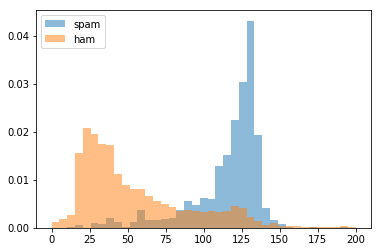

In [ ]:
'''
Qw are using 2 histograms, first to determing the body length for Spam
And we gonna use the second one to look at the body length of Non-Spam
'''

# 0 is the starting point, max 200 rows and 40 cut points.
# So below code will return the 40evenly spaced numbers between 0 to 200
# alpha parimeter is use for how dark we want our graph to be.
# Normed = True this will normalize our graph to the same scale.

bins = np.linspace(0, 200, 40)

pyplot.hist(data[data['lable'] == 'spam']['body_len'], bins, alpha=0.5, normed=True, label='spam')

pyplot.hist(data[data['lable'] == 'ham']['body_len'], bins, alpha=0.5, normed=True, label='ham')

pyplot.legend(loc = 'upper left')

pyplot.show()



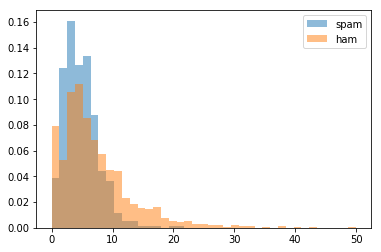

In [ ]:
# EVALUATING PUNCTUATION PERCENTAGE FEATURE, NO BINS HAVE MORE THAN 50% PUNCTUATION
# From the Graph below we can see that Spam messages are longer than Ham messages.
# HOWEVER THE ASSUMPTION THAT HAM CONTAINS LESS PUNCTUATIONS THAT SPAM DOESN'T SEEMS TO BE TRUE


bins = np.linspace(0, 50, 40)

pyplot.hist(data[data['lable'] == 'spam']['punct%'], bins, alpha=0.5, normed=True, label='spam')

pyplot.hist(data[data['lable'] == 'ham']['punct%'], bins, alpha=0.5, normed=True, label='ham')

pyplot.legend(loc = 'upper right')

pyplot.show()

### Feature Engineerign: Transformations

#### Reading the Text

In [ ]:
import pandas as pd

data = pd.read_csv("SMSSpamCollection.tsv", sep = '\t')
data.columns = ['lable', 'body_text']

#### Creating Two new features (Body Length and Punctuation Percentage)

In [ ]:
import string

def count_punct(text):

    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

'''When creating a lambda expression, you need to count the characters and ignore white spaces. 
What expression that helps you accomplish the task.

Answer:  lambda x: len(x) - x.count(" ")  '''


data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

data.head()

,lable,body_text,body_len,punct%
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.7
1,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,135,4.4


#### Plot the Two new Features(Body Length and Punctuation Percentage)

In [ ]:
from matplotlib import pyplot
import numpy as np

%matplotlib inline

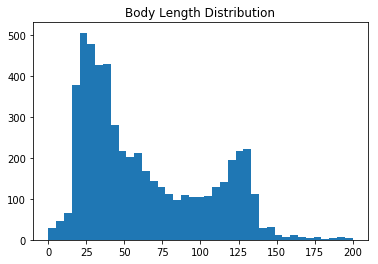

In [ ]:
# IN THIS SECTION WE WANT TO SEE THE FULL HISTOGRAM INSTEAD OF JUST CONCENTRATING ON HAMS AND SPAMS

# In the graph below the right section is Spam and left section is Ham

bins = np.linspace(0, 200, 40)

pyplot.hist(data['body_len'], bins)
pyplot.title("Body Length Distribution")
pyplot.show()

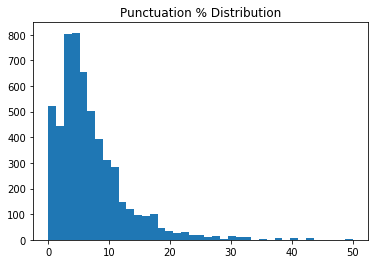

In [ ]:
bins = np.linspace(0, 50, 40)

pyplot.hist(data['punct%'], bins)
pyplot.title("Punctuation % Distribution")
pyplot.show()

###  Box-Cox power transformation

Transformation: It is the process that alters each data point  in certain column in a systematic way, that makes it cleaner for the model to use.

For eg: The transformation could be squaring each value in column or may be taking the square root of each value in the column.

Box-Cox prower transformation:

The base form of this type of transformation is y^x, where y is the value and in an individual cell and the x is the exponent of the power transformation we are applying.

Transformation Process:

1. Determine what range of exponents that we want to test

2. Apply each transformation to each value of your chosen feature.

3. Use some criteria to determine which of the transformations yiesd the best distribution. We can learn it from the various sources.


**Base Form**:   $y^x $

| X    | Base Form           |           Transformation               |
|------|--------------------------|--------------------------|
| -2   | $$ y ^ {-2} $$           | $$ \frac{1}{y^2} $$      |
| -1   | $$ y ^ {-1} $$           | $$ \frac{1}{y} $$        |
| -0.5 | $$ y ^ {\frac{-1}{2}} $$ | $$ \frac{1}{\sqrt{y}} $$ |
| 0    | $$ y^{0} $$              | $$ log(y) $$             |
| 0.5  | $$ y ^ {\frac{1}{2}}  $$ | $$ \sqrt{y} $$           |
| 1    | $$ y^{1} $$              | $$ y $$                  |
| 2    | $$ y^{2} $$              | $$ y^2 $$                |



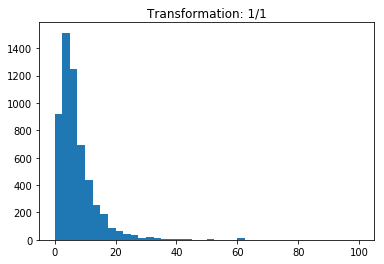

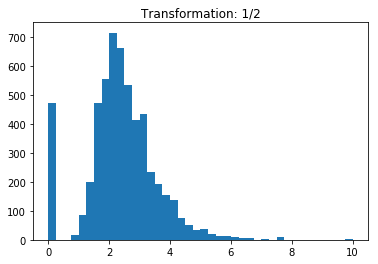

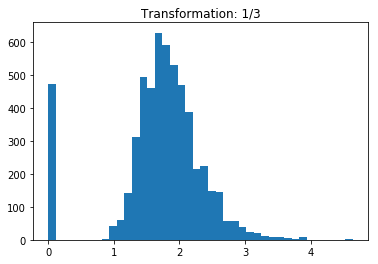

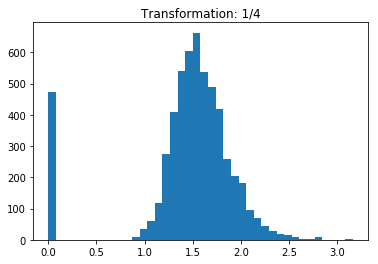

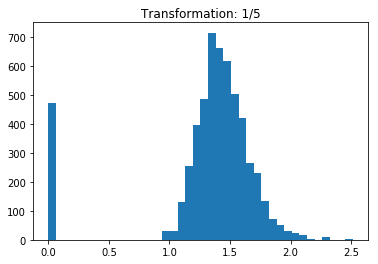

In [ ]:
# The Plot title will change on every loop, when we apply format function to it
# The i will represent the denominator in our exponent

for i in [1, 2, 3, 4, 5]:
    
    pyplot.hist((data['punct%'])**(1/i), bins=40)
    
    pyplot.title("Transformation: 1/{}".format((i)))
    
    pyplot.show()


#  The graph in the left is at 0, which means there is no punctuation 

# Chapter 5: Building Machine Learning Classifiers


Types of Evaluation Matrics

1. Accuracy

2. Precision

3. Recall

### Building Machine Learning Classifiers: Building a basic Random Forest model

#### Reading and Cleaning the Data

In [ ]:
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

stopwords = nltk.corpus.stopwords.words("english")
ps = nltk.PorterStemmer()

data = pd.read_csv("SMSSpamCollection.tsv", sep = '\t')

data.columns = ['lable', 'body_text']

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)* 100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

def clean_text(text):
    text = "".join([word for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    
# USING THE STEMMBR IN THE BELOW LINE   
    
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

tfidf_vect = TfidfVectorizer(analyzer = clean_text)
x_tfidf = tfidf_vect.fit_transform(data['body_text'])

x_features = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(x_tfidf.toarray())], axis= 1)
x_features.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,8324,8325,8326,8327,8328,8329,8330,8331,8332,8333
0,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,135,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### On cell 90,91,92, I was trying to remove the inconsistent numbers of samples: [5566, 5567]
### which I was getting in the cell 95. But it was might because of lack of RAM Memory

In [ ]:
'''

x_features.drop(data.index[::-3], inplace=True)
# df.drop(df.index[::-3], inplace=True)

#data.drop(data.index[::-3], inplace=True)

x_features.drop(data.index[::-3], inplace=True)
x_features.drop(data.index[::-3], inplace=True)
x_features.drop(data.index[::-3], inplace=True)

x_features[::-1]

'''


'\n\nx_features.drop(data.index[::-3], inplace=True)\n# df.drop(df.index[::-3], inplace=True)\n\n#data.drop(data.index[::-3], inplace=True)\n\nx_features.drop(data.index[::-3], inplace=True)\nx_features.drop(data.index[::-3], inplace=True)\nx_features.drop(data.index[::-3], inplace=True)\n\nx_features[::-1]\n\n'

In [ ]:
#x_features.drop(df.index[5566] , inplace=True)
#x_features.head()

In [ ]:
print(len(x_features))
print(len(data['body_len']))
print(len(data['punct%']))

print(len(data['body_text']))

#### Explore RandomForestClassifier Attributes & Hyperparameters

In [ ]:
from sklearn.ensemble import RandomForestClassifier

print(dir(RandomForestClassifier))
print(RandomForestClassifier())

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_estimator_type', '_get_param_names', '_make_estimator', '_set_oob_score', '_validate_X_predict', '_validate_estimator', '_validate_y_class_weight', 'apply', 'decision_path', 'feature_importances_', 'fit', 'get_params', 'predict', 'predict_log_proba', 'predict_proba', 'score', 'set_params']
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_sp

#### Explore RandomForestClassifier through Cross-Validation

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
# By setting 'n_jobs = -1'  will help us to run our model faster, by creating several
# ...decision trees in parallel

# The below code if giving error as the values are not same.



rf = RandomForestClassifier(n_jobs = -1)
k_fold = KFold(n_splits = 5)

cross_val_score(rf, x_features, data['lable'], cv = k_fold, scoring='accuracy', n_jobs= -1)





array([0.96678636, 0.98294434, 0.96765499, 0.9541779 , 0.97304582])

### Building Machine Learning Classifiers: Random Forest on a holdout test set

#### Read and Clean the Text

1. First we are reading our Data

2. Creating the new Features

3. Cleaning that Data

4. Then Vectorizing it.

In [ ]:
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

stopwords = nltk.corpus.stopwords.words("english")
ps = nltk.PorterStemmer()

# 1. Reading the Data

data = pd.read_csv("SMSSpamCollection.tsv", sep = '\t')

# 2. Creating new Features

data.columns = ['lable', 'body_text']

# 3. Cleaning the Data

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)* 100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

def clean_text(text):
    text = "".join([word for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    
# USING THE STEMMBR IN THE BELOW LINE   
    
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

# 4. Vectorizing the Data

tfidf_vect = TfidfVectorizer(analyzer = clean_text)
x_tfidf = tfidf_vect.fit_transform(data['body_text'])

x_features = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(x_tfidf.toarray())], axis= 1)
x_features.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,8324,8325,8326,8327,8328,8329,8330,8331,8332,8333
0,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,135,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Exploring Random Forest Classifier through Holdout Test Set

#### Importing Libraries

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

#### Using Train-Test Split

In [ ]:
# The 'train_test_split' will output Four Datasets, so we need to tell
# ...what we want to store it as.

x_train, x_test, y_train, y_test = train_test_split(x_features, data['lable'], test_size = 0.2)

#### Importing and Instantiating RandomForest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs= -1)

rf_model = rf.fit(x_train, y_train)

In [ ]:
# USING 'Feature_Importances' method offered by Random Forest

sorted(zip(rf_model.feature_importances_, x_train.columns), reverse=True)[0:10]

[(0.08722083078883845, 'body_len'),
 (0.05218005346089037, 2016),
 (0.030080639648899225, 2243),
 (0.02500125690739171, 3348),
 (0.02219255133496166, 7574),
 (0.021058765634501375, 6962),
 (0.01890049231735121, 5006),
 (0.014715742573641992, 2383),
 (0.01422256419371824, 7244),
 (0.014089731176582916, 5942)]

WE CAN SEE FROM THE ABOVE RESULT THAT THE 'BODY_LEN' IS THE MOST IMPORTANT FEATURE.

#### Using the Prediction method

In [ ]:
# WE ARE USING ONLY X METHOD FOR THE PREDICTION

y_pred = rf_model.predict(x_test)
precision,recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')

In [ ]:
'''
To calculate Accuracy, we will set y_pred = y_test. So what that will do, is it will pair
y_pred and y_test together and it will look row by row and see if they are equal to each other.
It they are the same, then it will return the True and if they are not the same, then it will
return the False. And if we put .sum in the end, then it will sum all the True
'''


print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3),
                                                     round(recall, 3),
                                                     round(y_pred == y_test).sum() / len(y_pred),3))

Precision: 1.0 / Recall: 0.604 / Accuracy: 0.9488330341113106


#### From the above result we can see that Precision is 100% which means the spam is identified as spam 100% of the time

#### The Recall is 62% which means that the only 62% of the messages goes into the Spam folder and rest went to the inbox

#### Accuracy is 94% which means our model manage to identify Spam and Non-Spam 94% of the time

### Random Forest model with Grid Search

Grid Search: In Grid Search we exhaustively seach all parameter combinations in a given grid to determine the best model.

Our last model was not eggressive enough, it was not capturing enough Spam emails. We can get better result by altering the Hyperparameter settings..?

That's where we use the Grid-Search, it is basically a grid of Hyperparameter settings, and then exploring a model fit with each combination of those Hyperparameter settings.

In [ ]:
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

stopwords = nltk.corpus.stopwords.words("english")
ps = nltk.PorterStemmer()

# 1. Reading the Data

data = pd.read_csv("SMSSpamCollection.tsv", sep = '\t')

# 2. Creating new Features

data.columns = ['lable', 'body_text']

# 3. Cleaning the Data

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)* 100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

def clean_text(text):
    text = "".join([word for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    
# USING THE STEMMBR IN THE BELOW LINE   
    
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

# 4. Vectorizing the Data

tfidf_vect = TfidfVectorizer(analyzer = clean_text)
x_tfidf = tfidf_vect.fit_transform(data['body_text'])

x_features = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(x_tfidf.toarray())], axis= 1)
x_features.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,8324,8325,8326,8327,8328,8329,8330,8331,8332,8333
0,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,135,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_features, data['lable'], test_size = 0.2)

In [ ]:
def train_RF(n_est, depth):
    RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs = -1)
    rf_model = rf.fit(x_train, y_train)
    y_pred = rf.fit(x_train, y_train)
    y_pred= rf_model.predict(x_test)
    precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')
    print('Est: {} / Depth: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
        n_est, depth, round(precision, 3), round(recall, 3),
        round((y_pred==y_test).sum() / len(y_pred), 3)))

In [ ]:
for n_est in [10, 50, 100]:
    for depth in [10, 20, 30, None]:
        train_RF(n_est, depth)

Est: 10 / Depth: 10 ---- Precision: 1.0 / Recall: 0.534 / Accuracy: 0.945
Est: 10 / Depth: 20 ---- Precision: 1.0 / Recall: 0.466 / Accuracy: 0.937
Est: 10 / Depth: 30 ---- Precision: 1.0 / Recall: 0.435 / Accuracy: 0.934
Est: 10 / Depth: None ---- Precision: 1.0 / Recall: 0.504 / Accuracy: 0.942
Est: 50 / Depth: 10 ---- Precision: 1.0 / Recall: 0.527 / Accuracy: 0.944
Est: 50 / Depth: 20 ---- Precision: 1.0 / Recall: 0.481 / Accuracy: 0.939
Est: 50 / Depth: 30 ---- Precision: 1.0 / Recall: 0.511 / Accuracy: 0.943
Est: 50 / Depth: None ---- Precision: 1.0 / Recall: 0.458 / Accuracy: 0.936
Est: 100 / Depth: 10 ---- Precision: 1.0 / Recall: 0.511 / Accuracy: 0.943
Est: 100 / Depth: 20 ---- Precision: 1.0 / Recall: 0.519 / Accuracy: 0.943
Est: 100 / Depth: 30 ---- Precision: 1.0 / Recall: 0.473 / Accuracy: 0.938
Est: 100 / Depth: None ---- Precision: 1.0 / Recall: 0.519 / Accuracy: 0.943


### Evaluate Random Forest with GridSearchCV - Using K-Fold and Grid-search

Grid-search: Exhaustively search all parameter combinations in a given grid to determine the best model.

Cross-validation(K-Fold): Divide a dataset into k subsets and repeat the holdout method k times where a different subset is used as the holdout set in each iteration.


In [ ]:
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import string

stopwords = nltk.corpus.stopwords.words("english")
ps = nltk.PorterStemmer()

# 1. Reading the Data

data = pd.read_csv("SMSSpamCollection.tsv", sep = '\t')

# 2. Creating new Features

data.columns = ['lable', 'body_text']

# 3. Cleaning the Data

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)* 100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

def clean_text(text):
    text = "".join([word for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    
# USING THE STEMMBR IN THE BELOW LINE   
    
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

# 4. Vectorizing the Data
# TF-IDF

tfidf_vect = TfidfVectorizer(analyzer = clean_text)
x_tfidf = tfidf_vect.fit_transform(data['body_text'])
x_tfidf_feat = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(x_tfidf.toarray())], axis=1)


# CountVectorizer

count_vect = CountVectorizer(analyzer=clean_text)
x_count = count_vect.fit_transform(data['body_text'])
x_count_feat = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(x_count.toarray())], axis=1)

x_count_feat.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,8324,8325,8326,8327,8328,8329,8330,8331,8332,8333
0,128,4.7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,49,4.1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,62,3.2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,28,7.1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,135,4.4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Exploring parameter settings using GridSearchCV

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#### Running code on TF-IDF

Can not run because of not enought memory

In [ ]:
rf = RandomForestClassifier()

# param = parameters
param = {'n_estimators': [10, 150, 300],
        'max_depth': [30, 60, 90, None]}


# cv = cross validation folds = 5

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(x_tfidf_feat, data['lable'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

#### Running code on Count Vectorization

In [ ]:
rf = RandomForestClassifier()

# param = parameters
param = {'n_estimators': [10, 150, 300],
        'max_depth': [30, 60, 90, None]}

# cv = cross validation folds = 5

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(x_count_feat, data['lable'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

### Gradient Boosting and Random Forest

The Gradient Boosting and Random Forest are both Ensmble Methods, Means they both combine several weak models and makes a strong model.

Both works on Decision Trees as well.

The differnece between Gradient Boosting and Random Forest is that Gradient Boosting uses Boosing and Random Forest uses Bagging.

Random Forest(Bagging): 
- It samples randomly. 
- Each tree in random forest is indepandent which means we can run several trees parallelly, means at the same time. It was have 100 trees, we can run them at the same time. 
- It is easy to Tune, Harder to overfit and is fast.

Gradient Boosting(Boosting): 

- It samples with an increased weight on the once that it got wrong previously. 
- It is iterative, which means it relies on the previous results of the trees, in order to apply a higher weight to the ones that previous tree got incorrect. 
- Boosting can't be parallelized and it takes much longer to train.
- It is harder to Tune and easier to Overfit
- The Gradient Boosting is powerful and better preforming if it is Tuned properly.

### Building Machine Leanring Classifier: Exploring Gradient Boosting  with Grid Search

#### Reading and Cleaning the Text

In [ ]:
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])

X_features = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)
X_features.head()

#### Exploring GradientBoostingClassifier Attributes & Hyperparameters

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

print(dir(GradientBoostingClassifier), '\n')
print(GradientBoostingClassifier())

#### Building the Grid Search

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_features, data['label'], test_size=0.2)

In [ ]:

def train_GB(est, max_depth, lr):
    gb = GradientBoostingClassifier(n_estimators=est, max_depth=max_depth, learning_rate=lr)
    gb_model = gb.fit(X_train, y_train)
    y_pred = gb_model.predict(X_test)
    precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
    print('Est: {} / Depth: {} / LR: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
        est, max_depth, lr, round(precision, 3), round(recall, 3), 
        round((y_pred==y_test).sum()/len(y_pred), 3)))

#### Note: The loop below will run slowly and will consume too much memory as we are using Gradient Boosting not the Random Forest

In [ ]:
for n_est in [50, 100, 150]:
    for max_depth in [3, 7, 11, 15]:
        for lr in [0.01, 0.1, 1]:
            train_GB(n_est, max_depth, lr)

### Evaluating Gradient Boosting model performance

In [ ]:
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import string

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

# TF-IDF
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])
X_tfidf_feat = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)

# CountVectorizer
count_vect = CountVectorizer(analyzer=clean_text)
X_count = count_vect.fit_transform(data['body_text'])
X_count_feat = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_count.toarray())], axis=1)

X_count_feat.head()

#### Exploring parameter settings using GridSearchCV

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

#### Running code on TF-IDF

In [ ]:
gb = GradientBoostingClassifier()
param = {
    'n_estimators': [100, 150], 
    'max_depth': [7, 11, 15],
    'learning_rate': [0.1]
}

# In Gradient Boosting the n_jobs = -1 means that it will train model on different subsets and parameter
# ...settings in parallel. It does not mean that it will train models in parallel because GB can't do that

clf = GridSearchCV(gb, param, cv=5, n_jobs=-1)
cv_fit = clf.fit(X_tfidf_feat, data['label'])
pd.DataFrame(cv_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

#### Running code on Count Vectorizer

In [ ]:
gb = GradientBoostingClassifier()
param = {
    'n_estimators': [50, 100, 150], 
    'max_depth': [7, 11, 15],
    'learning_rate': [0.1]
}

clf = GridSearchCV(gb, param, cv=5, n_jobs=-1)
cv_fit = clf.fit(X_count_feat, data['label'])
pd.DataFrame(cv_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

### Model Selection: Model which is giving the best result

#### Process

1. Split the data into Training and Test set

2. Train vectorizer on training set and use it to transform the test set.

3. Fit the best Random Forest model and best Gradient Boolsting model on training se t and predict on test set.

4. Thoroughly eveluate results of these two models to select best model.

In [ ]:
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

#### Spliting into Training and Testing set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[['body_text', 'body_len', 'punct%']], 
                                                    data['label'], test_size=0.2)

#### Vectorizing the Text

In [ ]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
tfidf_vect_fit = tfidf_vect.fit(X_train['body_text'])

tfidf_train = tfidf_vect_fit.transform(X_train['body_text'])
tfidf_test = tfidf_vect_fit.transform(X_test['body_text'])


# THE RESET INDEX FUNCTION WILL RESET THE INDEX TO THE NEW INDEX, WHICH IS CREATED BY THE NEW DATA-FRAME
X_train_vect = pd.concat([X_train[['body_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['body_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

#### Finding the Evaluation Model (Best Model)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
import time

#### Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

rf_model = rf.fit(X_train_vect, y_train)
y_pred = rf_model.predict(X_test_vect)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
print('Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

####  Gradient Boosting

In [ ]:
gb = GradientBoostingClassifier(n_estimators=150, max_depth=11)

gb_model = gb.fit(X_train_vect, y_train)
y_pred = gb_model.predict(X_test_vect)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
print('Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

### Final Result - Using the Time functiion to determine how long it took our model to compute

We will mainly focus on Predict time, Precision and Recall. The reason is once these models are fit, we generally store them for the purpose of making predictions later on. They won't be ever re-fit or re-trained again until you decide that your current model needs to be replaced.

So, that's why we care more about the Predict Time than the Fit Time.

#### Random Forest Classifier

In [ ]:
rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

# time.time() will take the start time, means when our model will start to compute

start = time.time()
rf_model = rf.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = rf_model.predict(X_test_vect)
end = time.time()
pred_time = (end - start)

# pos_label = Positive Label

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), 
    round((y_pred==y_test).sum()/len(y_pred), 3)))

#### Gradient Boosting Classifier

In [ ]:
gb = GradientBoostingClassifier(n_estimators=150, max_depth=11)

start = time.time()
gb_model = gb.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = gb_model.predict(X_test_vect)
end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), 
    round((y_pred==y_test).sum()/len(y_pred), 3)))